In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
agg_df = pd.read_csv('data/agg_df.csv')
agg_df

,key_labels,Plus/Minus,minutes_in_seconds,Possessions,mean_plus_minus_per_minute,mean_plus_minus_per_possesion
0,0-0-0-0-0,-1.000000,68.500000,2.250000,-0.875912,-0.444444
1,0-0-0-0-4,-0.048780,176.402439,6.426829,-0.016592,-0.007590
2,0-0-0-0-6,-1.181818,101.090909,3.636364,-0.701439,-0.325000
3,0-0-0-0-8,-0.243902,168.731707,6.292683,-0.086730,-0.038760
4,0-0-0-3-3,3.000000,45.000000,2.000000,4.000000,1.500000
...,...,...,...,...,...,...
117,5-5-5-5-8,-2.000000,67.000000,2.000000,-1.791045,-1.000000
118,5-5-5-8-8,0.000000,27.500000,1.000000,0.000000,0.000000
119,6-6-6-6-6,0.000000,60.500000,1.500000,0.000000,0.000000
120,7-7-7-7-7,-0.473684,99.815789,3.789474,-0.284735,-0.125000


In [4]:
# create a df of each game with the number of possessions per lineup and final pluis minus of the score


fives = pd.read_csv('data/fives_raw.csv', index_col = 0)

TEAM_NAME = 'Bnei Herzliya'
filtered_df = fives[fives['team_name'] == TEAM_NAME]
game_list = filtered_df['game_id'].unique()

total_team_df_fives = pd.DataFrame()
pm_per_pos = pd.DataFrame()

for game_id in game_list:
    single_game = filtered_df[filtered_df['game_id'] == game_id]
    final_plus_minus = single_game.groupby(['team_name']).sum()['Plus/Minus'].loc[TEAM_NAME]
    single_game_obs = single_game[['Possessions']].T
    single_game_obs['y'] = final_plus_minus
    total_team_df_fives = pd.concat([total_team_df_fives, single_game_obs])
    
    pm_per_possession = single_game['Plus/Minus']/single_game['Possessions']
    pm_per_pos = pd.concat([pm_per_pos, pm_per_possession])

total_team_df_fives.fillna(0, inplace=True)

In [5]:
total_team_df_fives

,"2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 1 S. Cohen III, 20 A. Michaeli","45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 9 M. Kemp","2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 0 G. Levin, 9 M. Kemp","10 O. Brandwein, 2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 9 M. Kemp","45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 2 S. Thompson Jr., 0 G. Levin","45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 0 G. Levin, 9 M. Kemp","45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 11 A. Van Vliet, 9 M. Kemp","45 J. Gamble, 21 Q. Hooker, 2 S. Thompson Jr., 3 Y. Kravitz, 9 M. Kemp","45 J. Gamble, 2 S. Thompson Jr., 3 Y. Kravitz, 9 M. Kemp, 1 S. Cohen III","2 S. Thompson Jr., 3 Y. Kravitz, 0 G. Levin, 9 M. Kemp, 1 S. Cohen III",...,"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 3 Y. Kravitz, 4 R. Carter","22 G. Artman, 10 O. Brandwein, 3 Y. Kravitz, 9 M. Kemp, 5 A. Schvartz","2 B. Weber, 19 C. Weiler-Babb, 45 J. Gamble, 11 A. Van Vliet, 1 S. Cohen III","2 B. Weber, 19 C. Weiler-Babb, 11 A. Van Vliet, 6 D. Sahar, 1 S. Cohen III","2 B. Weber, 19 C. Weiler-Babb, 3 Y. Kravitz, 9 M. Kemp, 1 S. Cohen III","19 C. Weiler-Babb, 45 J. Gamble, 10 O. Brandwein, 11 A. Van Vliet, 1 S. Cohen III","19 C. Weiler-Babb, 2 S. Thompson Jr., 3 Y. Kravitz, 9 M. Kemp, 1 S. Cohen III","19 C. Weiler-Babb, 2 S. Thompson Jr., 3 Y. Kravitz, 11 A. Van Vliet, 9 M. Kemp","19 C. Weiler-Babb, 10 O. Brandwein, 2 S. Thompson Jr., 11 A. Van Vliet, 9 M. Kemp","19 C. Weiler-Babb, 45 J. Gamble, 10 O. Brandwein, 2 S. Thompson Jr., 9 M. Kemp"
Possessions,4.0,8.0,1.0,2.0,11.0,1.0,6.0,7.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Possessions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Coefficients: 
 [-7.72405376e-04  2.80221954e-01 -4.26947791e-01  2.66355231e-01
  2.62099296e-01  8.61967363e-02  8.08202544e-01  4.11045560e-01
 -2.14201217e-02 -2.19830697e-01 -3.92797654e-01  3.21550966e-01
 -3.89433914e-01  2.28662172e-01  0.00000000e+00 -1.13574762e-01
  0.00000000e+00  0.00000000e+00 -2.57391166e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.40609899e-01
  0.00000000e+00 -4.78671904e-01 -1.37154496e-01  0.00000000e+00
 -1.11868867e-01  1.46555429e-01  4.73752263e-01  8.85458848e-02
  2.46504388e-02  1.08740914e-01  0.00000000e+00 -8.15301275e-02
  8.66994764e-01 -8.02458160e-02  0.00000000e+00 -1.13574762e-01
  4.38972536e-01  3.06073810e-02 -7.36690498e-01 -9.75170293e-02
 -1.84172624e-01 -1.06261503e-02 -4.40271245e-02 -1.22408836e-01
  2.85570195e-01 -1.13574762e-01  0.00000000e+00  0.00000000e+00
  4.93008775e-02  0.00000000e+00 -1.84172624e-01  2.81219798e-01
  2.07011984e-01  4.93008775e-02  2.29656291e-01 -2.20809957e-01
 -1.62936

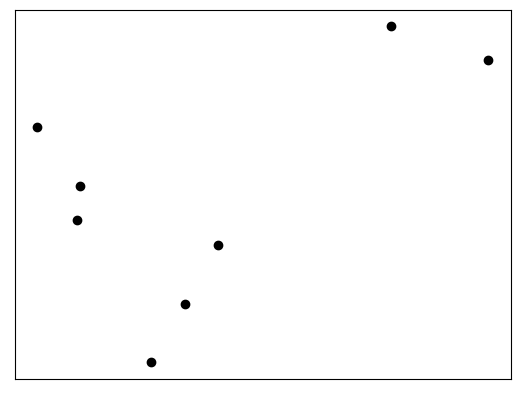

In [60]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X = total_team_df_fives[list(set(total_team_df_fives) - set(['y']))]
y = total_team_df_fives['y']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)



# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
print(X_test.shape , y_test.shape)
plt.scatter(y_pred, y_test, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [74]:
coeffs = pd.DataFrame((regr.coef_ / regr.coef_.sum())*100).T
coeffs = pd.DataFrame(regr.coef_).T
coeffs.columns = X.columns
coeffs.T.sort_values(0)


,0
"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 0 G. Levin, 9 M. Kemp",-0.736690
"19 C. Weiler-Babb, 45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 9 M. Kemp",-0.478672
"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 3 Y. Kravitz, 11 A. Van Vliet",-0.426948
"22 G. Artman, 10 O. Brandwein, 11 A. Van Vliet, 9 M. Kemp, 1 S. Cohen III",-0.392798
"10 O. Brandwein, 21 Q. Hooker, 0 G. Levin, 9 M. Kemp, 1 S. Cohen III",-0.389434
...,...
"19 C. Weiler-Babb, 45 J. Gamble, 21 Q. Hooker, 3 Y. Kravitz, 1 S. Cohen III",0.473752
"45 J. Gamble, 10 O. Brandwein, 21 Q. Hooker, 11 A. Van Vliet, 9 M. Kemp",0.505923
"19 C. Weiler-Babb, 10 O. Brandwein, 3 Y. Kravitz, 11 A. Van Vliet, 9 M. Kemp",0.808203
"19 C. Weiler-Babb, 45 J. Gamble, 21 Q. Hooker, 3 Y. Kravitz, 9 M. Kemp",0.866995


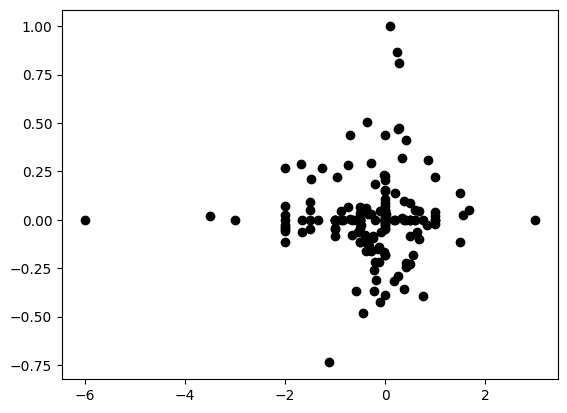

In [100]:
merge_posession_and_coeff = pm_per_pos.groupby(pm_per_pos.index).mean().dropna().merge(coeffs.T,
                                                 how='inner',
                                                          left_index=True,
                                                          right_index=True).rename(columns = {'0_x':'pm_per_pos',
                                                                                             '0_y': 'coeff'})
plt.scatter(merge_posession_and_coeff['pm_per_pos'],
            merge_posession_and_coeff['coeff'], color="black")

